A model with real unknowns has been initialized
Rectangle (0,2.0)x(0,1.0) has been meshed
Domain has been set
Domain is set and contains 1 mesh(es):
=== on mesh 0 of dim 2
* Subdomains are: {'Omega': 1}
* Boundaries are: {'Gamma_Bottom': 10, 'Gamma_Right': 11, 'Gamma_Top': 12, 'Gamma_Left': 13}
domain: Rectangle has been set
state: q has been added
port: q has been added 
costate: e_q has been added to state: q
state: q has new costate: e_q
FEM_PK(2,1) has been set for port q
T has been added to port: q
T has been set to [[5+x,x*y],[x*y,2+y]] in port: q
T has been initialized with the FEM of port: q
port: Damping has been added 
port: Boundary control (bottom) has been added on region 10
state: p has been added
port: p has been added 
costate: e_p has been added to state: p
state: p has new costate: e_p
FEM_PK(2,2) has been set for port p
rho has been added to port: p
rho has been set to 3-x in port: p
rho has been initialized with the FEM of port: p
port: Boundary control (right) has 

message from gf_mesh_get follow:
gfMesh object in dimension 2 with 274 points and 486 elements

message from gf_mesh_fem_get follow:
gfMeshFem object in dimension 2 with 274 points, 486 elements and 548 degrees of freedom

Parameter T has been evaluated with the fem of port ' q ', with expression: [[5+x,x*y],[x*y,2+y]]
message from gf_mesh_fem_get follow:
gfMeshFem object in dimension 2 with 274 points, 486 elements and 1033 degrees of freedom

Parameter rho has been evaluated with the fem of port ' p ', with expression: 3-x
message from gf_mesh_fem_get follow:
gfMeshFem object in dimension 2 with 274 points, 486 elements and 274 degrees of freedom

Parameter nu has been evaluated with the fem of port ' Damping ', with expression: 0.05*x
message from gf_mesh_fem_get follow:
gfMeshFem object in dimension 2 with 274 points, 486 elements and 274 degrees of freedom

message from gf_mesh_fem_get follow:
gfMeshFem object in dimension 2 with 274 points, 486 elements and 274 degrees of freedom

Initialisation done in 0.0625s


i=       0 t=       0 * (0s)   dt=    0.01        
i=       2 t=0.0132407 * (0s)   dt=0.00604909         
i=       4 t=0.0270011 * (0s)   dt=    0.01          
i=       5 t=0.0370011 * (0s)   dt=    0.01        
i=       6 t=0.0470011 * (0s)   dt=    0.01        
i=       7 t=0.0570011 * (0s)   dt=    0.01        
i=       8 t=0.0670011 * (0s)   dt=    0.01        
i=       9 t=0.0770011 * (0s)   dt=    0.01        
i=      10 t=0.0870011 * (0s)   dt=    0.01        
i=      11 t=0.0970011 * (0s)   dt=    0.01        
i=      12 t=0.107001 * (0s)   dt=    0.01        
i=      13 t=0.117001 * (0s)   dt=    0.01        
i=      14 t=0.127001 * (0s)   dt=    0.01        
i=      15 t=0.137001 * (0s)   dt=    0.01        
i=      16 t=0.147001 * (0s)   dt=    0.01        
i=      17 t=0.157001 * (0s)   dt=    0.01        
i=      18 t=0.167001 * (0s)   dt=    0.01        
i=      19 t=0.177001 * (0s)   dt=    0.01        
i=      20 t=0.187001 * (1s)   dt=    0.01        
i=      21 t=0.19

Elapsed time: 8.6s
Steps: 202 (1 rejected, 0 Nonlinear solver failures)
Nonlinear iterations: 205, Linear iterations: 205
Start computing the Hamiltonian
Hamiltonian has been computed in 0.31810324266552925 s
Start computing the powers (substituted ports are not automated)
Power cannot be computed for dynamic or substituted port q
Start computing the power flowing through Damping
Power in Damping has been computed in 0.11152777262032032 s
Start computing the power flowing through Boundary control (bottom)
Power in Boundary control (bottom) has been computed in 0.017145458608865738 s
Power cannot be computed for dynamic or substituted port p
Start computing the power flowing through Boundary control (right)
Power in Boundary control (right) has been computed in 0.015399694442749023 s
Start computing the power flowing through Boundary control (top)
Power in Boundary control (top) has been computed in 0.01675303280353546 s
Start computing the power flowing through Boundary control (left)


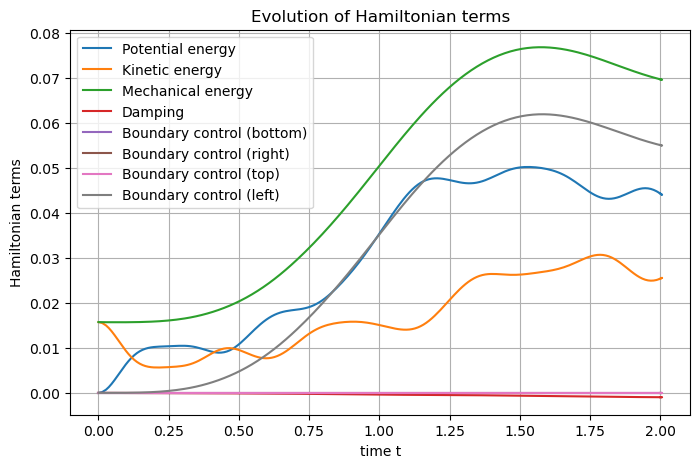

In [2]:
import scrimp as S
from itertools import zip_longest

# Init the distributed port-Hamiltonian system
wave = S.DPHS("real")

# Set the domain (using the built-in geometry `Rectangle`)
# Omega = 1, Gamma_Bottom = 10, Gamma_Right = 11, Gamma_Top = 12, Gamma_Left = 13
wave.set_domain(S.Domain("Rectangle", {"L": 2.0, "l": 1.0, "h": 0.1}))

## Define the variables and their discretizations

states = [
    S.State("q", "Strain", "vector-field"),
    S.State("p", "Linear momentum", "scalar-field"),
]
costates = [
    S.CoState("e_q", "Stress", states[0]),
    S.CoState("e_p", "Velocity", states[1]),
]
ports = [
    S.Port("Damping", "f_r", "e_r", "scalar-field"),
]
params = [
    S.Parameter("T", "Young's modulus", "tensor-field", "[[5+x,x*y],[x*y,2+y]]", "q"),
    S.Parameter("rho", "Mass density", "scalar-field", "3-x", "p"),
    S.Parameter("nu", "viscosity", "scalar-field", "0.05*x", "Damping"),
]

control_ports = [
    S.Control_Port(
        "Boundary control (bottom)",
        "U_B",
        "Normal force",
        "Y_B",
        "Velocity trace",
        "scalar-field",
        region=10,
    ),
    S.Control_Port(
        "Boundary control (right)",
        "U_R",
        "Normal force",
        "Y_R",
        "Velocity trace",
        "scalar-field",
        region=11,
    ),
    S.Control_Port(
        "Boundary control (top)",
        "U_T",
        "Normal force",
        "Y_T",
        "Velocity trace",
        "scalar-field",
        region=12,
    ),
    S.Control_Port(
        "Boundary control (left)",
        "U_L",
        "Velocity trace",
        "Y_L",
        "Normal force",
        "scalar-field",
        region=13,
        position="flow",
    ),
]

FEMs = [
    # name of the variable: (is the same of states, ports and controls ports), order, FEM
    S.FEM(states[0].get_name(), 1, "CG"),
    S.FEM(states[1].get_name(), 2, "CG"),
    S.FEM(ports[0].get_name(), 1, "CG"),
    S.FEM(control_ports[0].get_name(), 1, "CG"),
    S.FEM(control_ports[1].get_name(), 1, "CG"),
    S.FEM(control_ports[2].get_name(), 1, "CG"),
    S.FEM(control_ports[3].get_name(), 1, "CG"),
]

for state, costate, param, fem, port, control_port in zip_longest(
    states, costates, params, FEMs, ports, control_ports
):
    if state is not None:
        # Add a state
        wave.add_state(state)
    if costate is not None:
        # Add its co-state
        wave.add_costate(costate)
    if fem is not None:
        # Add a Finite Element Method to the `port`
        wave.add_FEM(fem)
    if param is not None:
        # Add a (possibly space-varying) parameter to the `port`
        wave.add_parameter(param)
    if port is not None:
        # Add a resistive `port`
        wave.add_port(port)
    if control_port is not None:
        # Add a control `port` on the bottom part of the boundary (Neumann, thus position='effort' - default)
        wave.add_control_port(control_port)

## Set Hamiltonian
wave.hamiltonian.set_name("Mechanical energy")

terms = [
    S.Term("Potential energy", "0.5*q.T.q", [1]),
    S.Term("Kinetic energy", "0.5*p*p/rho", [1]),
]

for term in terms:
    # Set the Hamiltonian (can be done later, even after solve)
    wave.hamiltonian.add_term(term)

## Define the Dirac structure via getfem `brick` = non-zero block matrix
bricks = [
    # Add the mass matrices from the left-hand side: the `flow` part of the Dirac structure
    S.Brick("M_q", "q.Test_q", [1], dt=True, position="flow"),
    S.Brick("M_p", "p*Test_p", [1], dt=True, position="flow"),
    S.Brick("M_r", "f_r*Test_f_r", [1], position="flow"),
    S.Brick("M_Y_B", "Y_B*Test_Y_B", [10], position="flow"),
    S.Brick("M_Y_R", "Y_R*Test_Y_R", [11], position="flow"),
    S.Brick("M_Y_T", "Y_T*Test_Y_T", [12], position="flow"),
    # The Dirichlet term is applied via Lagrange multiplier == the colocated output
    S.Brick("M_Y_L", "U_L*Test_Y_L", [13], position="flow"),
    # Add the matrices from the right-hand side: the `effort` part of the Dirac structure
    S.Brick("D", "Grad(e_p).Test_q", [1], position="effort"),
    S.Brick("-D^T", "-e_q.Grad(Test_p)", [1], position="effort"),
    S.Brick("I_r", "e_r*Test_p", [1], position="effort"),
    S.Brick("B_B", "U_B*Test_p", [10], position="effort"),
    S.Brick("B_R", "U_R*Test_p", [11], position="effort"),
    S.Brick("B_T", "U_T*Test_p", [12], position="effort"),
    # The Dirichlet term is applied via Lagrange multiplier == the colocated output
    S.Brick("B_L", "Y_L*Test_p", [13], position="effort"),
    S.Brick("-I_r^T", "-e_p*Test_f_r", [1], position="effort"),
    S.Brick("C_B", "-e_p*Test_Y_B", [10], position="effort"),
    S.Brick("C_R", "-e_p*Test_Y_R", [11], position="effort"),
    S.Brick("C_T", "-e_p*Test_Y_T", [12], position="effort"),
    S.Brick("C_L", "-e_p*Test_Y_L", [13], position="effort"),
    ## Define the constitutive relations as getfem `brick`
    # Hooke's law under implicit form - M_e_q e_q + CR_q q = 0
    S.Brick("-M_e_q", "-e_q.Test_e_q", [1]),
    S.Brick("CR_q", "q.T.Test_e_q", [1]),
    # Linear momentum definition under implicit form - M_e_p e_p + CR_p p = 0
    S.Brick("-M_e_p", "-e_p*Test_e_p", [1]),
    S.Brick("CR_p", "p/rho*Test_e_p", [1]),
    # Linear viscous fluid damping - M_e_r e_r + CR_r f_r = 0
    S.Brick("-M_e_r", "-e_r*Test_e_r", [1]),
    S.Brick("CR_r", "nu*f_r*Test_e_r", [1]),
]

for brick in bricks:
    wave.add_brick(brick)

## Initialize the problem
expressions = ["0.", "0.", "0.", "0.1*sin(2.*t)*sin(4*pi*y)"]

for control_port, expression in zip(control_ports, expressions):
    # Set the control functions (automatic construction of bricks such that -M_u u + f(t) = 0)
    wave.set_control(control_port.get_name(), expression)

# Set the initial data
wave.set_initial_value("q", "[0., 0.]")
wave.set_initial_value("p", "2.72**(-20*((x-0.5)*(x-0.5)+(y-0.5)*(y-0.5)))")

## Solve in time

# Define the time scheme
wave.set_time_scheme(
                     t_f=2., 
                     dt_save=0.01,
                     )

# Solve
wave.solve()

## Post-processing

# Plot the Hamiltonian with the power supplied at the boundary
wave.plot_Hamiltonian(save_figure=True)